In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
APProd = pd.read_csv('AndhraPradeshProduction.csv')
APRiceProd = APProd.where(APProd['Crop'] == 'Rice')
APRiceProd = APRiceProd.dropna()
APRiceProd = APRiceProd.drop(columns=['State_Name', 'District_Name', 'Crop', 'Area', 'Production'])
APRiceProd = pd.get_dummies(APRiceProd, columns=['Season'])
APRiceProd['Crop_Year'] = pd.to_numeric(APRiceProd['Crop_Year'], downcast='integer')

### Linear Regression Model

In [8]:
from sklearn.model_selection import train_test_split

X = APRiceProd.drop('Tonnes/Acres', axis = 1)
Y = APRiceProd['Tonnes/Acres']

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0, shuffle = False)

In [9]:
from sklearn.linear_model import LinearRegression

linearModel = LinearRegression()
linearModel.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
linearModel.score(X_train, Y_train)

0.4737988311256363

In [11]:
linearModel.score(x_test, y_test)

0.6761945376118725

In [12]:
y_predict = linearModel.predict(x_test)

Populating the interactive namespace from numpy and matplotlib


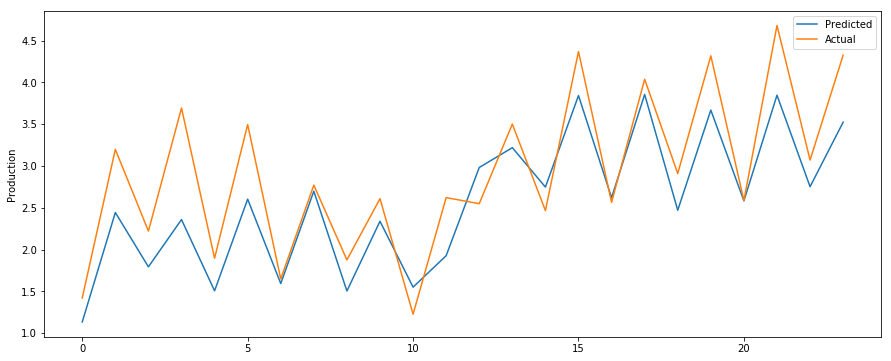

In [13]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('Production')

plt.legend()
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error

linearModel_mse = mean_squared_error(y_predict, y_test)
linearModel_mse

0.2953174081009157

In [15]:
x_test.tail(1)

Crop_Year  Precipitation  MinTemp    MaxTemp  CloudCover  \
2869       2002      48.781333  21.1545  30.997667   29.649833   

      VapourPressure  WetDayFrequency  DiurnalTemperatureRange  \
2869       23.010833         2.276033                 9.838667   

      GroundFrostFrequency  ReferenceCropEvapotranspiration  \
2869                   0.0                            3.945   

      PotentialEvapotranspiration  Season_Kharif  Season_Rabi  
2869                     5.631667              0            1

In [16]:
output = linearModel.predict(x_test)

In [17]:
output

array([1.13512489, 2.44444382, 1.79478036, 2.36019515, 1.50782221,
       2.60460296, 1.59507244, 2.69940632, 1.50565456, 2.33991994,
       1.5516958 , 1.92816288, 2.98276966, 3.22025199, 2.74895554,
       3.84376977, 2.62204488, 3.85680804, 2.47164366, 3.66984641,
       2.5838885 , 3.84780517, 2.75321544, 3.52520666])

### Linear Regression using Keras

In [18]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense

# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

# from keras.layers import Dense, Dropout, Flatten, Activation
# from keras import optimizers

In [19]:
train_data_X = APRiceProd.drop('Tonnes/Acres', axis = 1)
train_data_Y = APRiceProd['Tonnes/Acres']

#### Creating and Compiling model

In [20]:
# def baseline_model():
#     model = Sequential()
#     model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(1, kernel_initializer='normal'))

#     model.compile(loss='mean_squared_error', optimizer='adam')
#     return model

# seed = 7
# np.random.seed(seed)
# estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=1)

# kFold = KFold(n_splits=10, random_state=seed)
# results = cross_val_score(estimator, X, Y, cv=kFold)
# print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [21]:
# model2 = Sequential()
# model2.add(Dense(100, input_dim=13))
# model2.add(Activation('relu'))
# model2.add(Dense(1))
# sgd = optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
# model2.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])


# hist = model2.fit(train_data_X, train_data_Y, epochs=10, verbose=0, validation_split=0.2)

# y_pred = model2.predict_classes(x_test)

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


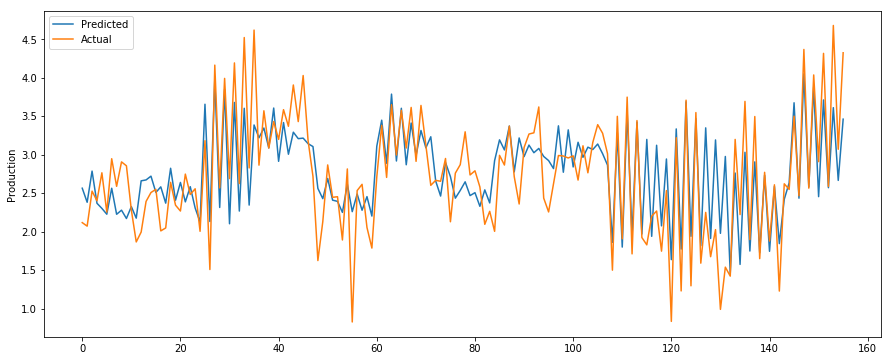

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

model = Sequential()
model.add(Dense(30, input_shape=(13,), kernel_initializer='normal', activation='relu', name='InputLayer'))
model.add(Dense(13, kernel_initializer='normal', activation='relu', name='HiddenLayer'))
model.add(Dense(1, kernel_initializer='normal', activation='linear', name='OutputLayer'))

#sgd = optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=False)
model.compile(loss='mse', optimizer='adam')

model.fit(X, Y, epochs=2500, batch_size=5, verbose=0)

y_predict = model.predict(X)

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(Y.values, label='Actual')
plt.ylabel('Production')

plt.legend()
plt.show()

In [25]:
model.evaluate(X, Y)

156/156 [==============================] - 1s 4ms/step


0.21581865350405374

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (Dense)           (None, 30)                420       
_________________________________________________________________
HiddenLayer (Dense)          (None, 13)                403       
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 14        
Total params: 837
Trainable params: 837
Non-trainable params: 0
_________________________________________________________________


### Sava a model to file

In [29]:
model_json = model.to_json()

with open("Prediction_Models/AP_Rice_Prediction.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("Prediction_Models/AP_Rice_Prediction_ModelWeights.h5")
print("Saved model to disk.")

Saved model to disk.


Populating the interactive namespace from numpy and matplotlib


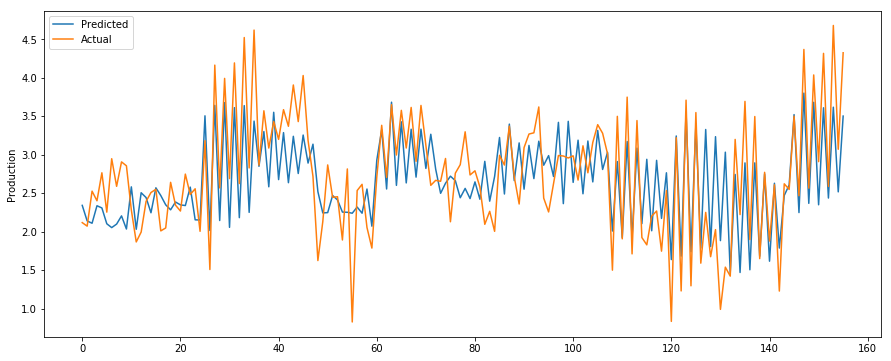

In [72]:
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=13, kernel_initializer='normal'))
model.add(Dense(1, activation='linear', kernel_initializer='normal'))

model.compile(loss='mse', optimizer='adam')
model.fit(train_data_X, train_data_Y, epochs=3000, batch_size=10, verbose=0)

y_predict = model.predict(X)
#print(y_predict)

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(Y.values, label='Actual')
plt.ylabel('Production')

plt.legend()
plt.show()

In [73]:
model.evaluate(X, Y)

156/156 [==============================] - 0s 2ms/step


0.25413342164112973

In [75]:
import keras
from keras.models import Sequential
from keras.layers import Dense

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from keras.layers import Dense, Dropout, Flatten, Activation
from keras import optimizers

In [77]:
def baseline_model():
    model = Sequential()
    model.add(Dense(30, activation='relu', input_dim=13, kernel_initializer='normal'))
    model.add(Dense(1, activation='linear', kernel_initializer='normal'))

    model.compile(loss='mse', optimizer='adam')
    return model

seed = 7
np.random.seed(seed)
estimator = KerasRegressor(build_fn=baseline_model, epochs=3000, batch_size=10, verbose=0)

kFold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kFold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.45 (0.29) MSE
